# Machine Lerning HW1

## 2. Linear Classifier
Using perceptron algorithm.

In [ ]:
import pandas as pd
import numpy as np
# read csv
df_data = pd.read_csv('./data.csv')
df_crx = pd.read_csv('./crx.csv')
# print(len(df_crx))

# crx
data_x = df_crx['att3'].to_numpy()
data_y_init = df_crx['label']
data_y = []
for i in range(len(data_y_init)):
  if data_y_init[i] == '+':
    data_y.append(1)
  else:
    data_y.append(-1)
# print(data_y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state = 487)

In [ ]:
w, b = 0, 0
for i in range(len(train_x)):
  x, y = train_x[i], train_y[i]
  tmp = y * (w * x + b)
  if(tmp <= 0):
    w = w + y * x
    b = b + y
    # print(w,b)
print(f'f(x) = {w} * x + ({b})')

#
pred_y = []
for i in range(len(test_x)):
  tmp = w * test_x[i] + b
  if tmp > 0:
    pred_y.append(1)
  else:
    pred_y.append(-1)
# print(pred_y)

f(x) = -7.915000000000003 * x + (-6)


In [ ]:
from sklearn.metrics import accuracy_score
print(f'{accuracy_score(test_y, pred_y)*100} %')

59.42028985507246 %


## 3. Least-Square Method 

In [ ]:
from scipy.optimize import curve_fit

def func(train_data, w, b):
  result = w * train_data + b
  return result
train_x_1 = train_x.flatten()
alpha = curve_fit(func, xdata = train_x_1, ydata = train_y)[0]

w_1, b_1 = alpha[0], alpha[1]
print(f'f(x) = {w_1} * x + ({b_1})')

f(x) = 0.0367180710490741 * x + (-0.2611757258831575)


In [ ]:
pred_y = []
for i in range(len(test_x)):
  tmp = w_1 * test_x[i] + b_1
  if tmp > 0:
    pred_y.append(1)
  else:
    pred_y.append(-1)

print(f'{accuracy_score(test_y, pred_y)*100} %')

67.3913043478261 %


## 4. Voted Perceptron Algorithm


In [ ]:
from tqdm import tqdm
def vote_perceptron(train_x, train_y, epoch_num):
  w = b = 0
  time_alive = 1
  perceptrons = []
  for _ in (range(epoch_num)):
    for i in range(len(train_x)):
      x = train_x[i]
      y = train_y[i]
      if y * (w * x + b) <= 0:
        # w,b store
        perceptrons.append([w, b, time_alive])
        time_alive = 1
        w = w + y * x
        b = b + y
      else:
        time_alive += 1
    perceptrons.append([w, b, time_alive])
  # print(len(perceptrons))
  return perceptrons

def vp_predict(perceptrons, test_data):
  sum = 0
  for perceptron in (perceptrons):
    w, b, weight = perceptron[0], perceptron[1], perceptron[2]
    sum += weight * np.sign(w * test_data + b)
  return np.sign(sum)

In [ ]:
perceptrons = vote_perceptron(train_x, train_y, 70)
pred_y = []
for i in tqdm(range(len(test_x))):
  pred_y.append(vp_predict(perceptrons, test_x[i]))

print(f'\n{accuracy_score(test_y, pred_y)*100} %')

100%|██████████| 138/138 [00:05<00:00, 24.50it/s]


61.59420289855072 %


## 5. Maxing margin

In [ ]:
# theshold = 60%
judge_num = 0
min_w = 100
min_b = 0
for perceptron in tqdm(perceptrons):
  w, b = perceptron[0], perceptron[1]
  for i in range(len(train_x)):
    tmp = train_y[i] * (w * train_x[i] + b)
    if(tmp > 1):
      judge_num += 1

  if(((judge_num/len(train_x)) > 0.6) and w**2 < min_w):
    min_w, min_b = w, b

print(f'\nf(x) = {min_w} * x + ({min_b})')

100%|██████████| 19274/19274 [00:12<00:00, 1600.48it/s]


f(x) = -0.6249999999999991 * x + (-3)


In [ ]:
pred_y = []
for i in range(len(test_x)):
  tmp = min_w * test_x[i] + min_b
  if tmp > 0:
    pred_y.append(1)
  else:
    pred_y.append(-1)

print(f'{accuracy_score(test_y, pred_y)*100} %')

59.42028985507246 %


## 6. Slack variables

In [ ]:
slack_var = 0
for i in range(len(train_x)):
  tmp = train_y[i] * (min_w * train_x[i] + min_b)
  if(tmp < 1):
    slack_var += (1 - tmp)

c = -(min_w**2)/slack_var
print(c)

-0.00020730991339421


## 7. SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC()
train_x = train_x.reshape(-1, 1)
clf.fit(train_x, train_y)

pred_y = clf.predict(test_x.reshape(-1, 1))
print(f'{accuracy_score(test_y, pred_y)*100} %')

65.94202898550725 %


## Draw figure

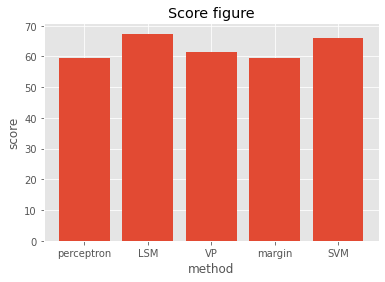

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

method = ['perceptron', 'LSM', 'VP', 'margin', 'SVM']
scores = [59.42, 67.39, 61.59, 59.42, 65.94]
x = np.arange(len(method))
plt.bar(x, scores)
plt.xticks(x, method)
plt.xlabel('method')
plt.ylabel('score')
plt.title('Score figure')
plt.show()